<a href="https://colab.research.google.com/github/Trisha-Annambhotla/Thermal-image-human-detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving labels.zip to labels.zip


In [ ]:
import zipfile
import os

# Replace with your uploaded zip filename
zip_filename = 'labels.zip'  # or whatever name you uploaded

# Extract to a folder
extract_folder = 'dataset'  # name of the folder you want to extract to
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("✅ Extraction complete. Files are now in the folder:", extract_folder)


✅ Extraction complete. Files are now in the folder: dataset


In [ ]:
file_id = "1EAr49kN0zW8IRwkEGDhVCd_DkZcnogZF"
!gdown --id {file_id} --output dataset.zip

# Unzip into existing 'dataset/' folder
!unzip -o dataset.zip -d dataset/


Streaming output truncated to the last 5000 lines.
  inflating: dataset/enhanced_dataset/enhanced_train/enhanced_100812.jpg  
  inflating: dataset/enhanced_dataset/enhanced_train/enhanced_100813.jpg  
  inflating: dataset/enhanced_dataset/enhanced_train/enhanced_100814.jpg  
  inflating: dataset/enhanced_dataset/enhanced_train/enhanced_100815.jpg  
  inflating: dataset/enhanced_dataset/enhanced_train/enhanced_100816.jpg  
  inflating: dataset/enhanced_dataset/enhanced_train/enhanced_100818.jpg  
  inflating: dataset/enhanced_dataset/enhanced_train/enhanced_100819.jpg  
  inflating: dataset/enhanced_dataset/enhanced_train/enhanced_100820.jpg  
  inflating: dataset/enhanced_dataset/enhanced_train/enhanced_100821.jpg  
  inflating: dataset/enhanced_dataset/enhanced_train/enhanced_100822.jpg  
  inflating: dataset/enhanced_dataset/enhanced_train/enhanced_100823.jpg  
  inflating: dataset/enhanced_dataset/enhanced_train/enhanced_100824.jpg  
  inflating: dataset/enhanced_dataset/enhanced_tr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import shutil
import random
import re
from collections import defaultdict

# Paths
image_dir = '/content/dataset/enhanced_dataset/enhanced_train'
label_dir = '/content/dataset/labels'
output_image_dir = '/content/drive/MyDrive/dataset/new_sample/images'
output_label_dir = '/content/drive/MyDrive/dataset/new_sample/labels'

# Create output directories
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

# Step 1: Group images by human count
bins = defaultdict(list)
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for file in image_files:
    match = re.search(r'(\d+)', file)
    if not match:
        continue
    numeric_id = match.group(1)
    label_file = numeric_id + '.txt'
    label_path = os.path.join(label_dir, label_file)

    if not os.path.exists(label_path):
        continue

    with open(label_path, 'r') as f:
        human_count = len(f.readlines())

    # Only consider reasonable range, skip empty labels or extreme outliers
    if human_count == 0 or human_count > 12:
        continue

    bins[human_count].append((file, label_file))

# Step 2: Normalize sampling per bin
max_samples_per_bin = 100  # cap to avoid overfitting or data imbalance
min_available = min(len(imgs) for imgs in bins.values() if len(imgs) >= 10)  # avoid rare counts

samples_per_bin = min(max_samples_per_bin, min_available)
selected = []

for count in sorted(bins.keys()):
    bin_files = bins[count]
    n = min(samples_per_bin, len(bin_files))  # adjust if bin is smaller
    sampled = random.sample(bin_files, n)
    selected.extend(sampled)
    print(f"Selected {n} samples for human count = {count}")

# Step 3: Copy selected images and labels
for img_file, lbl_file in selected:
    shutil.copy(os.path.join(image_dir, img_file), os.path.join(output_image_dir, img_file))
    shutil.copy(os.path.join(label_dir, lbl_file), os.path.join(output_label_dir, lbl_file))

print(f"✅ Total {len(selected)} image-label pairs copied with normalized human count distribution.")


✅ 2000 random images and correctly matched labels copied successfully.


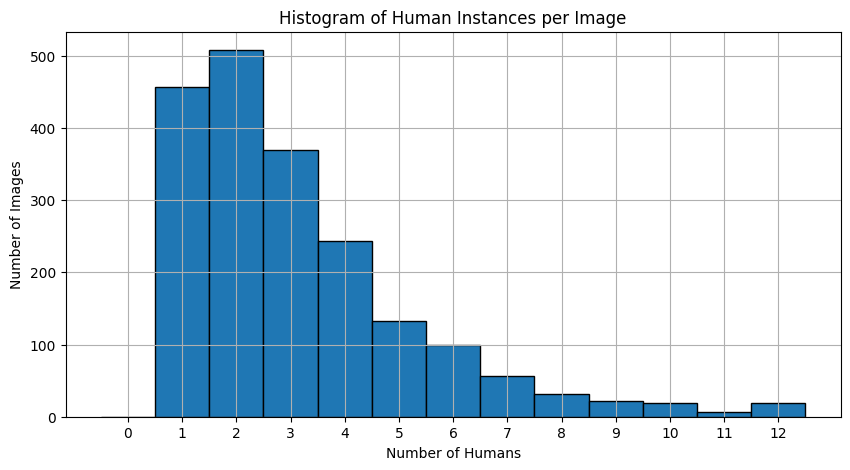

In [ ]:
import os
import matplotlib.pyplot as plt

label_dir = '/content/drive/MyDrive/dataset/new_sample/labels'
human_class_id = '0'

# Collect human counts per label file
human_counts = []
for filename in os.listdir(label_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(label_dir, filename), 'r') as f:
            count = sum(1 for line in f if line.strip().split()[0] == human_class_id)
            human_counts.append(count)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(human_counts, bins=range(0, max(human_counts)+2), edgecolor='black', align='left')
plt.title('Histogram of Human Instances per Image')
plt.xlabel('Number of Humans')
plt.ylabel('Number of Images')
plt.xticks(range(0, max(human_counts)+1))
plt.grid(True)
plt.show()


Selected 150 samples from sqrt bin = 1
Selected 150 samples from sqrt bin = 2
Selected 150 samples from sqrt bin = 3
📊 Total selected samples: 450
✅ Balanced dataset created using square root transformation.


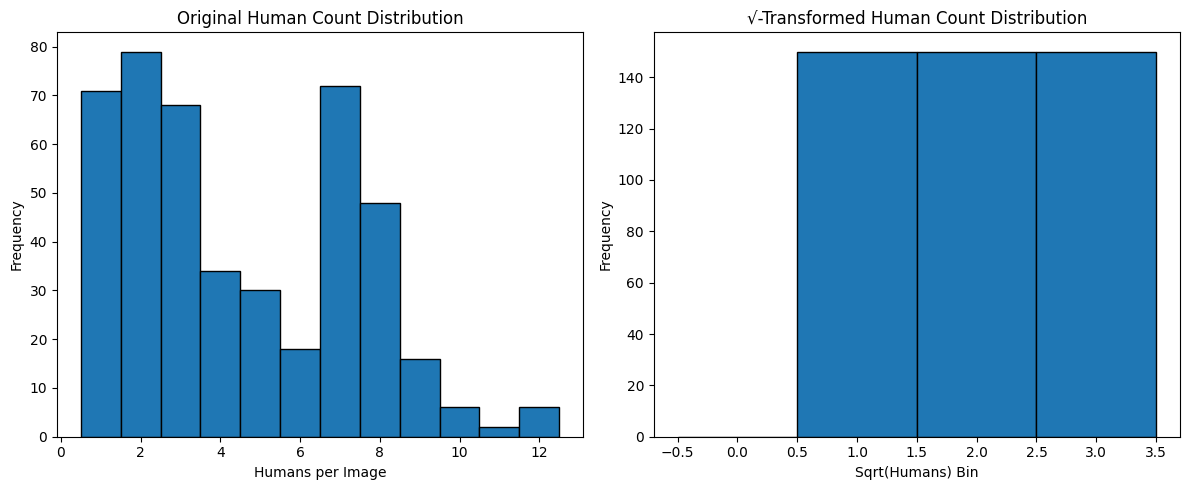

In [ ]:
import os
import shutil
import random
import re
import math
from collections import defaultdict
import matplotlib.pyplot as plt

# Paths
image_dir = '/content/dataset/enhanced_dataset/enhanced_train'
label_dir = '/content/dataset/labels'
output_image_dir = '/content/drive/MyDrive/dataset/sqrt_balanced/images'
output_label_dir = '/content/drive/MyDrive/dataset/sqrt_balanced/labels'

# Create output directories
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

# Step 1: Calculate human counts and apply square root transformation
transformed_bins = defaultdict(list)
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for file in image_files:
    match = re.search(r'(\d+)', file)
    if not match:
        continue
    numeric_id = match.group(1)
    label_file = numeric_id + '.txt'
    label_path = os.path.join(label_dir, label_file)

    if not os.path.exists(label_path):
        continue

    with open(label_path, 'r') as f:
        count = len(f.readlines())

    if count == 0 or count > 12:  # Ignore outliers/extremes
        continue

    # Square root transformation (rounded for binning)
    transformed = round(math.sqrt(count))
    transformed_bins[transformed].append((file, label_file))

# Step 2: Sample uniformly from transformed bins
sampled = []
samples_per_bin = 150  # adjust based on dataset size and target total
for bin_val in sorted(transformed_bins.keys()):
    items = transformed_bins[bin_val]
    n = min(len(items), samples_per_bin)
    sampled.extend(random.sample(items, n))
    print(f"Selected {n} samples from sqrt bin = {bin_val}")

print(f"📊 Total selected samples: {len(sampled)}")

# Step 3: Copy selected image-label pairs
for img_file, lbl_file in sampled:
    shutil.copy(os.path.join(image_dir, img_file), os.path.join(output_image_dir, img_file))
    shutil.copy(os.path.join(label_dir, lbl_file), os.path.join(output_label_dir, lbl_file))

print("✅ Balanced dataset created using square root transformation.")

# Step 4: Visualize original vs transformed distribution
original_counts = []
transformed_counts = []

for img_file, lbl_file in sampled:
    label_path = os.path.join(label_dir, lbl_file)
    with open(label_path, 'r') as f:
        count = len(f.readlines())
    original_counts.append(count)
    transformed_counts.append(round(math.sqrt(count)))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(original_counts, bins=range(1, max(original_counts)+2), edgecolor='black', align='left')
plt.title("Original Human Count Distribution")
plt.xlabel("Humans per Image")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(transformed_counts, bins=range(0, max(transformed_counts)+2), edgecolor='black', align='left')
plt.title("√-Transformed Human Count Distribution")
plt.xlabel("Sqrt(Humans) Bin")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


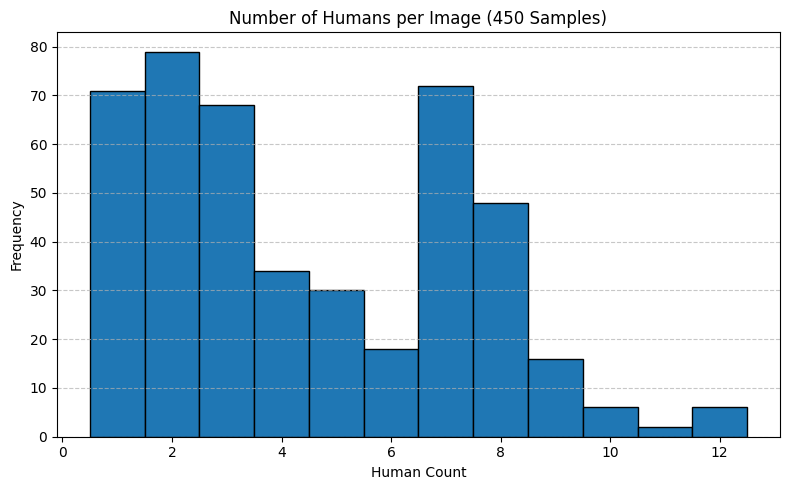

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to your selected labels (450 samples)
label_dir = '/content/drive/MyDrive/dataset/sqrt_balanced/labels'

# Count humans per label
human_counts = []
for file in os.listdir(label_dir):
    if file.endswith('.txt'):
        with open(os.path.join(label_dir, file), 'r') as f:
            count = len(f.readlines())
            human_counts.append(count)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(human_counts, bins=range(1, max(human_counts)+2), edgecolor='black', align='left')
plt.title("Number of Humans per Image (450 Samples)")
plt.xlabel("Human Count")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import statistics
import numpy as np

# Basic statistics
mean_val = statistics.mean(human_counts)
median_val = statistics.median(human_counts)
mode_val = statistics.mode(human_counts)
std_dev = statistics.stdev(human_counts)
max_val = max(human_counts)
min_val = min(human_counts)
percentiles = np.percentile(human_counts, [25, 50, 75])

# Print statistics
print("📊 Human Instance Statistics:")
print(f"Total images           : {len(human_counts)}")
print(f"Mean humans/image      : {mean_val:.2f}")
print(f"Median humans/image    : {median_val}")
print(f"Mode humans/image      : {mode_val}")
print(f"Std. Deviation         : {std_dev:.2f}")
print(f"Min humans in image    : {min_val}")
print(f"Max humans in image    : {max_val}")
print(f"25th, 50th, 75th percentiles: {percentiles}")


📊 Human Instance Statistics:
Total images           : 1966
Mean humans/image      : 3.13
Median humans/image    : 3.0
Mode humans/image      : 2
Std. Deviation         : 2.18
Min humans in image    : 1
Max humans in image    : 12
25th, 50th, 75th percentiles: [2. 3. 4.]


In [ ]:
import os
import shutil
import re
import random
from collections import defaultdict

# === CONFIGURATION ===
image_dir = '/content/dataset/enhanced_dataset/enhanced_train'
label_dir = '/content/dataset/labels'

output_image_dir = '/content/drive/MyDrive/dataset/balanced_0_to_12/images'
output_label_dir = '/content/drive/MyDrive/dataset/balanced_0_to_12/labels'
max_samples_per_category = 300

# === CREATE OUTPUT FOLDERS ===
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

# === GROUP IMAGES BY HUMAN COUNT ===
bins = defaultdict(list)
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for file in image_files:
    match = re.search(r'(\d+)', file)
    if not match:
        continue
    numeric_id = match.group(1)
    label_file = numeric_id + '.txt'
    label_path = os.path.join(label_dir, label_file)

    if not os.path.exists(label_path):
        continue

    with open(label_path, 'r') as f:
        count = len(f.readlines())

    if 0 <= count <= 12:
        bins[count].append((file, label_file))

# === SAMPLE AND COPY FILES ===
selected_total = 0
for human_count in range(0, 13):  # 0 to 12 inclusive
    entries = bins[human_count]
    n = min(len(entries), max_samples_per_category)
    sampled = random.sample(entries, n)
    print(f"✔️  Selected {n} samples for human count = {human_count}")
    selected_total += n

    for img_file, lbl_file in sampled:
        shutil.copy(os.path.join(image_dir, img_file), os.path.join(output_image_dir, img_file))
        shutil.copy(os.path.join(label_dir, lbl_file), os.path.join(output_label_dir, lbl_file))

print(f"\n✅ Total {selected_total} image-label pairs copied.")


✔️  Selected 0 samples for human count = 0
✔️  Selected 300 samples for human count = 1
✔️  Selected 300 samples for human count = 2
✔️  Selected 300 samples for human count = 3
✔️  Selected 300 samples for human count = 4
✔️  Selected 300 samples for human count = 5
✔️  Selected 300 samples for human count = 6
✔️  Selected 260 samples for human count = 7
✔️  Selected 122 samples for human count = 8
✔️  Selected 51 samples for human count = 9
✔️  Selected 24 samples for human count = 10
✔️  Selected 6 samples for human count = 11
✔️  Selected 19 samples for human count = 12

✅ Total 2282 image-label pairs copied.


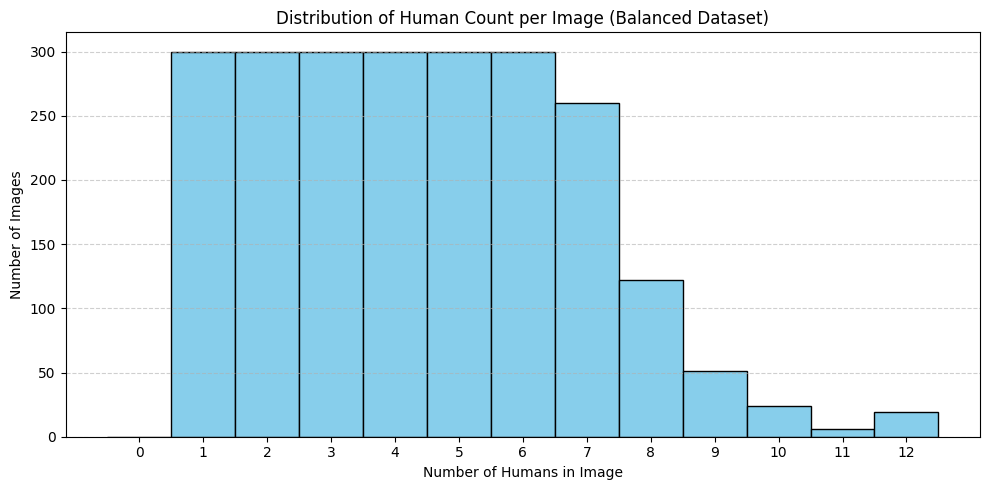

In [ ]:
import os
import matplotlib.pyplot as plt

# Set the path to your balanced label directory
label_dir = '/content/drive/MyDrive/dataset/balanced_0_to_12/labels'

# Count humans per image
human_counts = []
for file in os.listdir(label_dir):
    if file.endswith('.txt'):
        with open(os.path.join(label_dir, file), 'r') as f:
            count = len(f.readlines())
            human_counts.append(count)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(human_counts, bins=range(14), align='left', edgecolor='black', color='skyblue')
plt.xticks(range(13))
plt.xlabel('Number of Humans in Image')
plt.ylabel('Number of Images')
plt.title('Distribution of Human Count per Image (Balanced Dataset)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

# Input and output paths
img_dir = '/content/drive/MyDrive/dataset/balanced_0_to_12/images'
save_dir = '/content/drive/MyDrive/dataset/balanced_0_to_12/images_clahe'

# Create output directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Initialize CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Collect image filenames
img_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif'))]

# Process each image
for img_file in tqdm(img_files, desc="Enhancing images with CLAHE"):
    img_path = os.path.join(img_dir, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Skipping {img_file}: Image not found or unreadable.")
        continue

    # Apply CLAHE
    enhanced_img = clahe.apply(img)

    # Save enhanced image
    save_path = os.path.join(save_dir, img_file)
    cv2.imwrite(save_path, enhanced_img)

print("✅ All images processed and saved to:", save_dir)


Enhancing images with CLAHE: 100%|██████████| 2282/2282 [01:44<00:00, 21.78it/s]

✅ All images processed and saved to: /content/drive/MyDrive/dataset/balanced_0_to_12/images_clahe


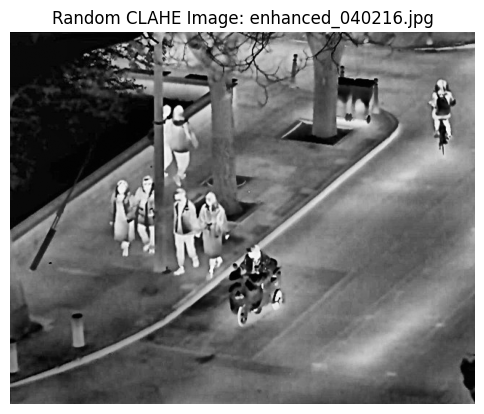

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2
import os

# Directory with CLAHE-enhanced images
enhanced_dir = '/content/drive/MyDrive/dataset/balanced_0_to_12/images_clahe'

# Get list of image files
img_files = [f for f in os.listdir(enhanced_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif'))]

# Pick one at random
random_img = random.choice(img_files)
img_path = os.path.join(enhanced_dir, random_img)

# Load and display
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title(f'Random CLAHE Image: {random_img}')
plt.axis('off')
plt.show()


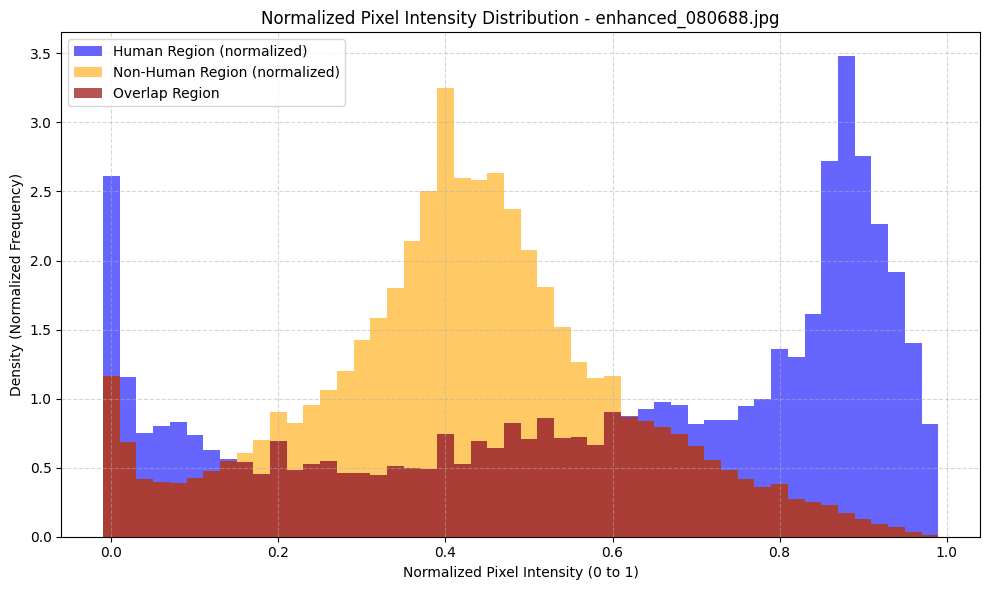

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

# === NEW DATASET PATHS ===
img_dir = '/content/drive/MyDrive/dataset/balanced_0_to_12/images_clahe'  # CLAHE-enhanced images
label_dir = '/content/drive/MyDrive/dataset/balanced_0_to_12/labels'

# Get valid image-label pairs
img_files = [f for f in os.listdir(img_dir) if f.lower().endswith('.jpg')]
valid_files = [f for f in img_files if os.path.exists(os.path.join(label_dir, os.path.splitext(f[9:])[0] + '.txt'))]  # Adjusted name format for labels

# Randomly choose one image-label pair
chosen_file = random.choice(valid_files)
img_path = os.path.join(img_dir, chosen_file)
label_path = os.path.join(label_dir, os.path.splitext(chosen_file[9:])[0] + '.txt')  # Extract name without 'enhanced_'

# Load enhanced CLAHE grayscale image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

# === Function to create mask from YOLO labels ===
def create_mask_from_yolo(img_shape, label_path):
    height, width = img_shape[:2]
    mask = np.zeros((height, width), dtype=np.uint8)
    with open(label_path, 'r') as file:
        for line in file:
            cls, x_center, y_center, w, h = map(float, line.strip().split())
            x_center, y_center = x_center * width, y_center * height
            w, h = w * width, h * height
            x1 = max(0, int(x_center - w/2))
            y1 = max(0, int(y_center - h/2))
            x2 = min(width-1, int(x_center + w/2))
            y2 = min(height-1, int(y_center + h/2))
            if x2 > x1 and y2 > y1:
                cv2.rectangle(mask, (x1, y1), (x2, y2), 255, thickness=-1)
    return mask

# Create mask for human region from YOLO labels
mask = create_mask_from_yolo(img.shape, label_path)

# === Extract pixel intensities for human and non-human regions ===
human_pixels = img[mask == 255].reshape(-1, 1)
non_human_pixels = img[mask == 0].reshape(-1, 1)

# Normalize pixel intensities to the range [0, 1]
scaler = MinMaxScaler()
scaler.fit(np.vstack((human_pixels, non_human_pixels)))

human_norm = scaler.transform(human_pixels)
non_human_norm = scaler.transform(non_human_pixels)

# === Define bins for histogram and calculate histograms ===
bins = np.linspace(0, 1, 51)  # 50 bins between 0 and 1

human_hist, _ = np.histogram(human_norm, bins=bins, density=True)
non_human_hist, _ = np.histogram(non_human_norm, bins=bins, density=True)

# Compute overlap histogram (minimum of both)
overlap_hist = np.minimum(human_hist, non_human_hist)

# === Plotting the histograms ===
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], human_hist, width=bins[1]-bins[0], alpha=0.6, color='blue', label='Human Region (normalized)')
plt.bar(bins[:-1], non_human_hist, width=bins[1]-bins[0], alpha=0.6, color='orange', label='Non-Human Region (normalized)')

# Plot overlap bars in brown
plt.bar(bins[:-1], overlap_hist, width=bins[1]-bins[0], alpha=0.8, color='brown', label='Overlap Region')

plt.title(f'Normalized Pixel Intensity Distribution - {chosen_file}')
plt.xlabel('Normalized Pixel Intensity (0 to 1)')
plt.ylabel('Density (Normalized Frequency)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
!pip install -q albumentations


In [ ]:
import os
import cv2
import albumentations as A
from tqdm import tqdm

# Input and output directories
input_dir = '/content/drive/MyDrive/dataset/balanced_0_to_12/images_clahe'
output_dir = '/content/drive/MyDrive/dataset/balanced_0_to_12/images_aug_only'
os.makedirs(output_dir, exist_ok=True)

# Define augmentations (safe ones that won't affect bbox positioning)
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.Blur(blur_limit=3, p=0.2),
    A.CLAHE(p=0.2),
    A.RandomGamma(p=0.2),
    A.HueSaturationValue(p=0.3),
])

# Process each image
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_file in tqdm(image_files, desc="Augmenting images only"):
    img_path = os.path.join(input_dir, img_file)
    image = cv2.imread(img_path)
    if image is None:
        print(f"Skipping {img_file}: unreadable.")
        continue

    for i in range(2):  # Create 2 augmentations per image
        augmented = transform(image=image)
        aug_img = augmented['image']

        aug_filename = img_file.replace('.jpg', f'_aug{i}.jpg')
        save_path = os.path.join(output_dir, aug_filename)
        cv2.imwrite(save_path, aug_img)

print("Image-only augmentation complete.")


Augmenting images only: 100%|██████████| 2282/2282 [02:13<00:00, 17.09it/s]

Image-only augmentation complete.


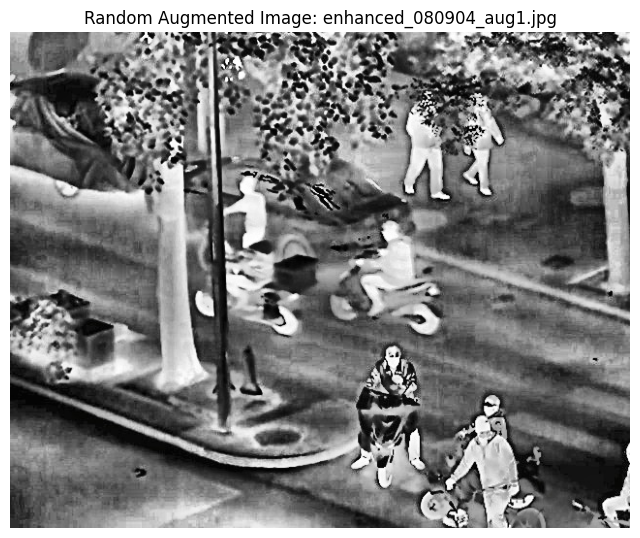

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Path to the folder containing augmented images
augmented_dir = '/content/drive/MyDrive/dataset/balanced_0_to_12/images_aug_only'

# List all image files in the augmented folder
augmented_images = [f for f in os.listdir(augmented_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Pick a random image
random_image = random.choice(augmented_images)

# Load the random image
img_path = os.path.join(augmented_dir, random_image)
img = cv2.imread(img_path)

# Convert color from BGR to RGB (for proper display in matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Random Augmented Image: {random_image}")
plt.show()


In [ ]:
# Install
!pip install roboflow

# Authenticate
!roboflow login

# Import
!roboflow import -w trisha-lqpz6 -p final-ragj7 /content/drive/MyDrive/dataset/balanced_0_to_12/images_aug_only

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: 
loading Roboflow workspace...
loading Roboflow project...
Traceback (most recent call last):
  File "/usr/local/bin/roboflow", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/

In [ ]:
!roboflow login

# Import
!roboflow import -w trisha-lqpz6 -p final-ragj7 /content/drive/MyDrive/dataset/balanced_0_to_12/images_aug_only

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...
100% 4564/4564 [00:00<00:00, 1414527.71it/s]
Uploading to existing project trisha-lqpz6/final-ragj7
[UPLOADED] /content/drive/MyDrive/dataset/balanced_0_to_12/images_aug_only/enhanced_010018_aug0.jpg (4UiQBnCxutf8jSwUBxcy) [1.6s]
[UPLOADED] /content/drive/MyDrive/dataset/balanced_0_to_12/images_aug_only/enhanced_010010_aug1.jpg (qKCQqbcFepcfN9fP9ORs) [1.7s]
[UPLOADED] /content/drive/MyDrive/dataset/balanced_0_to_12/images_aug_only/enhanced_010004_aug1.jpg (1z5ZDm1B3kO7xO9GzSBw) [1.8s]
[UPLOADED] /content/drive/MyDrive/dataset/balanced_0_to_12/images_aug_only/enhanced_010004_aug0.jpg (FcbGRdKeDFXOVZMYYRpa) [1.8s]
[UPLOADED] /content/drive/MyDrive/dataset/balanced_0_to_12/images_aug_only/enhanced_010010_aug0.jpg (mCUu5h62pwmKnAEWT5fq) [1.9s]
[UPLOADED] /content/drive/MyDrive/dataset/balanced_0_to_12/images_aug_only/enhanced_010018_aug1.

In [ ]:
import os
import re
from pathlib import Path

# Define the directory
folder_path = "/content/drive/MyDrive/dataset/balanced_0_to_12/images_aug_only"

# Loop through the files
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Skip if it's not a file
    if not os.path.isfile(file_path):
        continue

    # If the file ends with _aug1.jpg
    if file_name.endswith("_aug1.jpg"):
        # Extract just the number from the filename using regex
        match = re.search(r"(\d+)_aug1\.jpg$", file_name)
        if match:
            new_name = f"{match.group(1)}.jpg"
            new_path = os.path.join(folder_path, new_name)
            os.rename(file_path, new_path)
    else:
        # Delete all other augmented files like _aug0
        os.remove(file_path)

print("✅ Renaming complete. Only _aug1 images are kept and renamed.")


✅ Renaming complete. Only _aug1 images are kept and renamed.


In [ ]:
import os
import shutil

# Define source and destination paths
images_src = "/content/drive/MyDrive/dataset/balanced_0_to_12/images_aug_only"
labels_src = "/content/drive/MyDrive/dataset/balanced_0_to_12/labels"
dest_dir = "/content/drive/MyDrive/dataset/coco_dataset"

# Create destination directory if it doesn't exist
os.makedirs(dest_dir, exist_ok=True)

# Get list of images and sort numerically
image_files = sorted([f for f in os.listdir(images_src) if f.endswith(".jpg")])

for image_file in image_files:
    base_name = os.path.splitext(image_file)[0]  # e.g., "01001"
    label_file = base_name + ".txt"

    # Full paths
    img_src_path = os.path.join(images_src, image_file)
    lbl_src_path = os.path.join(labels_src, label_file)

    img_dst_path = os.path.join(dest_dir, image_file)
    lbl_dst_path = os.path.join(dest_dir, label_file)

    # Copy image
    shutil.copy(img_src_path, img_dst_path)

    # Copy label if it exists
    if os.path.exists(lbl_src_path):
        shutil.copy(lbl_src_path, lbl_dst_path)
    else:
        print(f"⚠️ Warning: Label file not found for {image_file}")

print("✅ All image-label pairs copied to coco_dataset.")


✅ All image-label pairs copied to coco_dataset.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pijlfvuLEY1N32zzMO5q")
project = rf.workspace("trisha-lqpz6").project("coco_conversion_dataset")
version = project.version(1)
dataset = version.download("coco")


In [ ]:
!pip install pylabel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.5/842.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.0 MB/s eta 0:00:00
